In [214]:
import os

import pandas as pd
import numpy as np

In [215]:
audio_folder = '../../data/ICBHI_final_database'

In [216]:
ylabel = pd.read_csv('../../data/filename_label.txt',delimiter = '\t',header=None)
ylabel.columns = ['Participant_ID','Outcome']

In [217]:
demo_df = pd.read_csv('../../data/filename_demographic.txt',delimiter = '\t',header=None)
demo_df.columns = ['Participant_ID', 'Age', 'Sex', 'Adult BMI (kg/m2)', 'Child Weight (kg)', 'Child Height (cm)']

In [218]:
demo_df

,Participant_ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
...,...,...,...,...,...,...
121,222,60.00,M,NaN,NaN,NaN
122,223,NaN,NaN,NaN,NaN,NaN
123,224,10.00,F,NaN,32.3,143.0
124,225,0.83,M,NaN,7.8,74.0


In [219]:
list_files = []
for file in os.listdir(audio_folder):
    if file.endswith('.wav'):
        audio_file = file.split('.wav')[0]
        list_files.append(audio_file)
df_file = pd.DataFrame(list_files,columns=['filename'])

df_file['Participant_ID'] = df_file['filename'].apply(lambda x: x.split('_')[0]).astype(int)

In [220]:
df_file

,filename,Participant_ID
0,122_2b1_Tc_mc_LittC2SE,122
1,113_1b1_Lr_sc_Litt3200,113
2,178_1b3_Pl_mc_AKGC417L,178
3,220_1b1_Tc_mc_LittC2SE,220
4,176_1b3_Tc_mc_AKGC417L,176
...,...,...
915,174_1p3_Pr_mc_AKGC417L,174
916,139_1b1_Al_sc_Litt3200,139
917,203_2p3_Pr_mc_AKGC417L,203
918,135_2b1_Al_mc_LittC2SE,135


In [221]:
df_file.isna().sum()

filename          0
Participant_ID    0
dtype: int64

In [222]:
demo_df = demo_df.merge(ylabel,on='Participant_ID',how='outer')
demo_df = demo_df.merge(df_file,on='Participant_ID',how='outer')

In [223]:
demo_df

,Participant_ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Outcome,filename
0,101,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Al_sc_Meditron
1,101,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Pr_sc_Meditron
2,102,0.75,F,NaN,9.8,73.0,Healthy,102_1b1_Ar_sc_Meditron
3,103,70.00,F,33.00,NaN,NaN,Asthma,103_2b2_Ar_mc_LittC2SE
4,104,70.00,F,28.47,NaN,NaN,COPD,104_1b1_Ar_sc_Litt3200
...,...,...,...,...,...,...,...,...
915,224,10.00,F,NaN,32.3,143.0,Healthy,224_1b1_Tc_sc_Meditron
916,225,0.83,M,NaN,7.8,74.0,Healthy,225_1b1_Pl_sc_Meditron
917,226,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Al_sc_Meditron
918,226,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Pl_sc_LittC2SE


In [224]:
list_series = []
import os 
for file in os.listdir(audio_folder):
    if file.endswith('events.txt'):
        event_file = os.path.join(audio_folder,file)
        df_cw = pd.DataFrame({'filename':file.split('_events')[0], 'wheeze':[0],'crackle':[0]})
        try:
            df_label = pd.read_csv(event_file,delimiter='\t',header=None)    
            xx = df_label[2].value_counts().to_frame().T
            if 'wheeze' in xx.columns:
                df_cw['wheeze'] = xx['wheeze'].values[0]
            if 'crackle' in xx.columns:
                df_cw['crackle'] = xx['crackle'].values[0]
        except:
            pass
        list_series.append(df_cw)
df_cw = pd.concat(list_series)

In [225]:
demo_df

,Participant_ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Outcome,filename
0,101,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Al_sc_Meditron
1,101,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Pr_sc_Meditron
2,102,0.75,F,NaN,9.8,73.0,Healthy,102_1b1_Ar_sc_Meditron
3,103,70.00,F,33.00,NaN,NaN,Asthma,103_2b2_Ar_mc_LittC2SE
4,104,70.00,F,28.47,NaN,NaN,COPD,104_1b1_Ar_sc_Litt3200
...,...,...,...,...,...,...,...,...
915,224,10.00,F,NaN,32.3,143.0,Healthy,224_1b1_Tc_sc_Meditron
916,225,0.83,M,NaN,7.8,74.0,Healthy,225_1b1_Pl_sc_Meditron
917,226,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Al_sc_Meditron
918,226,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Pl_sc_LittC2SE


In [226]:
demo_df = demo_df.merge(df_cw,on='filename',how='outer')

In [227]:
demo_df

,Participant_ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Outcome,filename,wheeze,crackle
0,101.0,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Al_sc_Meditron,0.0,0.0
1,101.0,3.00,F,NaN,19.0,99.0,URTI,101_1b1_Pr_sc_Meditron,0.0,0.0
2,102.0,0.75,F,NaN,9.8,73.0,Healthy,102_1b1_Ar_sc_Meditron,0.0,0.0
3,103.0,70.00,F,33.00,NaN,NaN,Asthma,103_2b2_Ar_mc_LittC2SE,5.0,0.0
4,104.0,70.00,F,28.47,NaN,NaN,COPD,104_1b1_Ar_sc_Litt3200,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...
916,225.0,0.83,M,NaN,7.8,74.0,Healthy,225_1b1_Pl_sc_Meditron,0.0,0.0
917,226.0,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Al_sc_Meditron,0.0,2.0
918,226.0,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Pl_sc_LittC2SE,NaN,NaN
919,226.0,4.00,M,NaN,16.7,103.0,Pneumonia,226_1b1_Ll_sc_Meditron,0.0,9.0


<AxesSubplot: xlabel='Outcome'>

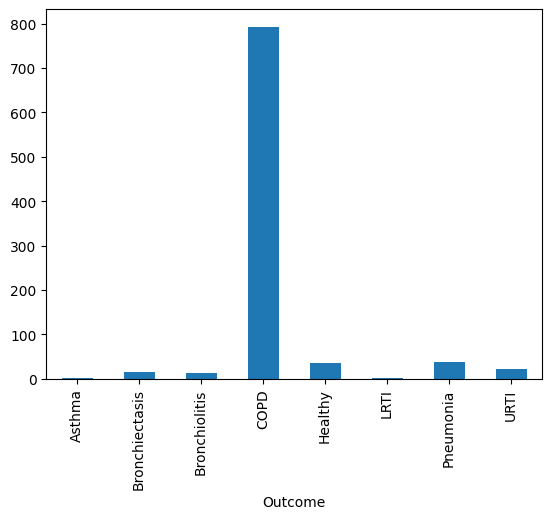

In [228]:
demo_df.groupby('Outcome').count()['Participant_ID'].plot.bar()

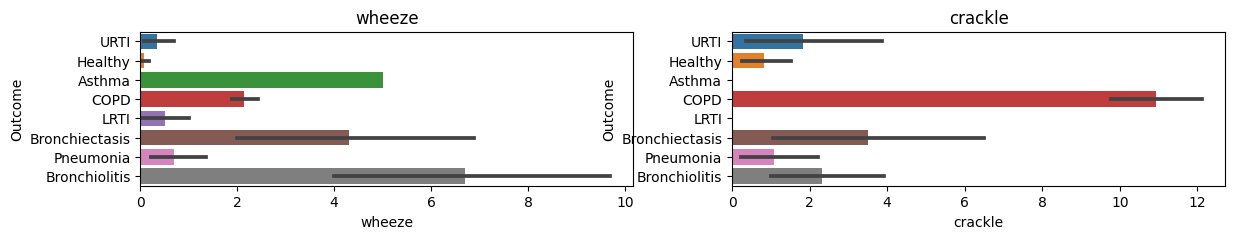

,wheeze,crackle
Outcome,,
Asthma,5.000000,0.000000
Bronchiectasis,4.312500,3.500000
Bronchiolitis,6.692308,2.307692
COPD,2.142497,10.933165
Healthy,0.085714,0.828571
LRTI,0.500000,0.000000
Pneumonia,0.694444,1.083333
URTI,0.347826,1.826087


In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(14,2))
sns.barplot(orient='h',data=demo_df,x='wheeze',y='Outcome',ax=ax[0])
sns.barplot(orient='h',data=demo_df,x='crackle',y='Outcome',ax=ax[1])
ax[0].set_title('wheeze')
ax[1].set_title('crackle')
plt.show()

demo_df.groupby('Outcome').mean(numeric_only=True)[['wheeze','crackle']]


In [230]:
demo_df['recording_type'] = demo_df.filename.apply(lambda x: x.split('_')[-1])

In [231]:
demo_df.loc[demo_df.filename=='226_1b1_Pl_sc_Meditron','Outcome'] ='Pneumonia'
demo_df.loc[demo_df.filename=='226_1b1_Pl_sc_Meditron','Participant_ID'] ='226'

<h1>Save Data<h1>

In [232]:
#demo_df = demo_df.set_index('filename')
demo_df.to_csv('info_dataset.csv')